In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
matFilename = '../Data/2017-06-30_batchdata_updated_struct_errorcorrect.mat'
f = h5py.File(matFilename)

In [4]:
list(f.keys())

['#refs#', '#subsystem#', 'batch', 'batch_date']

In [5]:
batch = f['batch']

In [6]:
list(batch.keys())

['Vdlin',
 'barcode',
 'channel_id',
 'cycle_life',
 'cycles',
 'policy',
 'policy_readable',
 'summary']

In [7]:
num_cells = batch['summary'].shape[0]
bat_dict = {}
for i in range(num_cells):
    cl = f[batch['cycle_life'][i,0]][()]
    policy = f[batch['policy_readable'][i,0]][()].tobytes()[::2].decode()
    summary_IR = np.hstack(f[batch['summary'][i,0]]['IR'][0,:].tolist())
    summary_QC = np.hstack(f[batch['summary'][i,0]]['QCharge'][0,:].tolist())
    summary_QD = np.hstack(f[batch['summary'][i,0]]['QDischarge'][0,:].tolist())
    summary_TA = np.hstack(f[batch['summary'][i,0]]['Tavg'][0,:].tolist())
    summary_TM = np.hstack(f[batch['summary'][i,0]]['Tmin'][0,:].tolist())
    summary_TX = np.hstack(f[batch['summary'][i,0]]['Tmax'][0,:].tolist())
    summary_CT = np.hstack(f[batch['summary'][i,0]]['chargetime'][0,:].tolist())
    summary_CY = np.hstack(f[batch['summary'][i,0]]['cycle'][0,:].tolist())
    summary = {'IR': summary_IR, 'QC': summary_QC, 'QD': summary_QD, 'Tavg':
                summary_TA, 'Tmin': summary_TM, 'Tmax': summary_TX, 'chargetime': summary_CT,
                'cycle': summary_CY}
    cycles = f[batch['cycles'][i,0]]
    cycle_dict = {}
    for j in range(cycles['I'].shape[0]):
        I = np.hstack((f[cycles['I'][j,0]][()]))
        Qc = np.hstack((f[cycles['Qc'][j,0]][()]))
        Qd = np.hstack((f[cycles['Qd'][j,0]][()]))
        Qdlin = np.hstack((f[cycles['Qdlin'][j,0]][()]))
        T = np.hstack((f[cycles['T'][j,0]][()]))
        Tdlin = np.hstack((f[cycles['Tdlin'][j,0]][()]))
        V = np.hstack((f[cycles['V'][j,0]][()]))
        dQdV = np.hstack((f[cycles['discharge_dQdV'][j,0]][()]))
        t = np.hstack((f[cycles['t'][j,0]][()]))
        cd = {'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}
        cycle_dict[str(j)] = cd
        
    cell_dict = {'cycle_life': cl, 'charge_policy':policy, 'summary': summary, 'cycles': cycle_dict}
    key = 'b2c' + str(i)
    bat_dict[key]=   cell_dict

In [8]:
bat_dict.keys()

dict_keys(['b2c0', 'b2c1', 'b2c2', 'b2c3', 'b2c4', 'b2c5', 'b2c6', 'b2c7', 'b2c8', 'b2c9', 'b2c10', 'b2c11', 'b2c12', 'b2c13', 'b2c14', 'b2c15', 'b2c16', 'b2c17', 'b2c18', 'b2c19', 'b2c20', 'b2c21', 'b2c22', 'b2c23', 'b2c24', 'b2c25', 'b2c26', 'b2c27', 'b2c28', 'b2c29', 'b2c30', 'b2c31', 'b2c32', 'b2c33', 'b2c34', 'b2c35', 'b2c36', 'b2c37', 'b2c38', 'b2c39', 'b2c40', 'b2c41', 'b2c42', 'b2c43', 'b2c44', 'b2c45', 'b2c46', 'b2c47'])

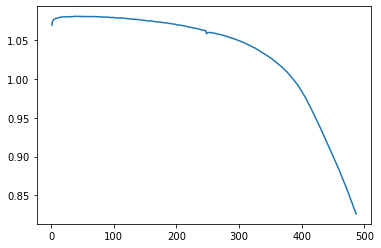

In [9]:
plt.plot(bat_dict['b2c43']['summary']['cycle'], bat_dict['b2c43']['summary']['QD'])

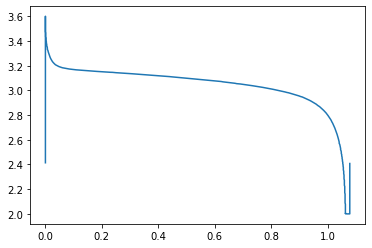

In [10]:
plt.plot(bat_dict['b2c43']['cycles']['10']['Qd'], bat_dict['b2c43']['cycles']['10']['V'])

In [12]:
with open('../Data/batch2.pkl','wb') as fp:
        pickle.dump(bat_dict,fp)

In [13]:
def nest_key(d, indent=0):
    
    for key, value in d.items():
        
        print('\t' * indent + f'{key}')
        
        if isinstance(value, dict):
            
            nest_key(value, indent+1)

In [14]:
nest_key(bat_dict)

b2c0
	cycle_life
	charge_policy
	summary
		IR
		QC
		QD
		Tavg
		Tmin
		Tmax
		chargetime
		cycle
	cycles
		0
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		1
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		2
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		3
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		4
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		5
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		6
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		7
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		8
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		9
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		10
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		11
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		12
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		13
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		14
			I
			Qc
			Qd


			Tdlin
			V
			dQdV
			t
		131
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		132
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		133
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		134
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		135
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		136
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		137
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		138
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		139
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		140
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		141
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		142
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		143
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		144
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		145
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		146
			I
		

			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		264
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		265
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		266
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		267
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		268
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		269
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		270
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		271
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		272
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		273
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		274
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		275
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		276
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		277
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		278
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V


			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		80
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		81
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		82
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		83
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		84
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		85
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		86
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		87
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		88
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		89
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		90
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		91
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		92
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		93
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		94
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		95
			

			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		50
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		51
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		52
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		53
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		54
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		55
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		56
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		57
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		58
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		59
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		60
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		61
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		62
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		63
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		64
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		65
			I
			Q

			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		192
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		193
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		194
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		195
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		196
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		197
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		198
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		199
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		200
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		201
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		202
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		203
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		204
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		205
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		206
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t

			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		349
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		350
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		351
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		352
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		353
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		354
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		355
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		356
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		357
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		358
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		359
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		360
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		361
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		362
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		363
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V


			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		132
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		133
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		134
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		135
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		136
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		137
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		138
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		139
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		140
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		141
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		142
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		143
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		144
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		145
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		146
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin


			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		262
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		263
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		264
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		265
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		266
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		267
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		268
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		269
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		270
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		271
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		272
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		273
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		274
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		275
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		276
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQd

			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		49
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		50
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		51
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		52
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		53
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		54
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		55
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		56
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		57
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		58
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		59
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		60
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		61
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		62
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		63
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
		

			T
			Tdlin
			V
			dQdV
			t
		319
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		320
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		321
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		322
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		323
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		324
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		325
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		326
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		327
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		328
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		329
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		330
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		331
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		332
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		333
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		334
		

			T
			Tdlin
			V
			dQdV
			t
		5
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		6
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		7
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		8
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		9
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		10
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		11
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		12
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		13
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		14
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		15
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		16
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		17
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		18
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		19
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		20
			I
			Qc
			Qd
			Qdl

			T
			Tdlin
			V
			dQdV
			t
		174
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		175
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		176
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		177
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		178
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		179
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		180
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		181
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		182
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		183
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		184
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		185
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		186
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		187
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		188
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		189
		

			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		344
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		345
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		346
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		347
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		348
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		349
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		350
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		351
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		352
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		353
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		354
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		355
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		356
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		357
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		358
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V


			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		9
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		10
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		11
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		12
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		13
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		14
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		15
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		16
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		17
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		18
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		19
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		20
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		21
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		22
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		23
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			

			t
		182
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		183
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		184
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		185
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		186
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		187
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		188
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		189
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		190
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		191
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		192
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		193
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		194
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		195
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		196
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		197
			I
			Qc
			Qd
			Qdlin
			

			t
		352
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		353
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		354
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		355
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		356
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		357
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		358
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		359
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		360
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		361
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		362
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		363
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		364
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		365
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		366
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		367
			I
			Qc
			Qd
			Qdlin
			

			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		526
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		527
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		528
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		529
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		530
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		531
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		532
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		533
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		534
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		535
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		536
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		537
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		538
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		539
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		540
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin


			T
			Tdlin
			V
			dQdV
			t
		136
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		137
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		138
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		139
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		140
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		141
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		142
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		143
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		144
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		145
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		146
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		147
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		148
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		149
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		150
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		151
		

			Tdlin
			V
			dQdV
			t
		308
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		309
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		310
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		311
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		312
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		313
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		314
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		315
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		316
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		317
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		318
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		319
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		320
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		321
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		322
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		323
			I
		

			dQdV
			t
		472
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		473
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		474
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		475
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		476
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		477
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		478
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		479
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		480
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		481
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		482
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		483
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		484
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		485
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		486
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		487
			I
			Qc
			Qd
			Q

			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		623
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		624
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		625
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		626
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		627
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		628
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		629
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		630
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		631
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		632
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		633
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		634
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		635
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		636
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		637
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQd

		124
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		125
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		126
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		127
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		128
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		129
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		130
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		131
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		132
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		133
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		134
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		135
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		136
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		137
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		138
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		139
			I
			Qc
			Qd
			Qdlin
			T
			

			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		281
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		282
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		283
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		284
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		285
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		286
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		287
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		288
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		289
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		290
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		291
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		292
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		293
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		294
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		295
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQd

			dQdV
			t
		445
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		446
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		447
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		448
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		449
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		450
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		451
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		452
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		453
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		454
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		455
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		456
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		457
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		458
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		459
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		460
			I
			Qc
			Qd
			Q

			dQdV
			t
		615
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		616
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		617
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		618
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		619
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		620
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		621
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		622
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		623
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		624
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		625
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		626
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		627
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		628
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		629
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		630
			I
			Qc
			Qd
			Q

			t
		783
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		784
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		785
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		786
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		787
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		788
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		789
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		790
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		791
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		792
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		793
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		794
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		795
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		796
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		797
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		798
			I
			Qc
			Qd
			Qdlin
			

			t
		951
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		952
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		953
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		954
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		955
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		956
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		957
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		958
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		959
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		960
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		961
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		962
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		963
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		964
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		965
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		966
			I
			Qc
			Qd
			Qdlin
			

			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		143
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		144
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		145
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		146
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		147
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		148
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		149
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		150
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		151
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		152
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		153
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		154
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		155
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		156
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		157
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin


			t
		310
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		311
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		312
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		313
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		314
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		315
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		316
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		317
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		318
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		319
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		320
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		321
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		322
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		323
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		324
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		325
			I
			Qc
			Qd
			Qdlin
			

			Tdlin
			V
			dQdV
			t
		481
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		482
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		483
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		484
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		485
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		486
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		487
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		488
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		489
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		490
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		491
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		492
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		493
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		494
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		495
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		496
			I
		

			Tdlin
			V
			dQdV
			t
		655
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		656
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		657
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		658
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		659
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		660
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		661
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		662
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		663
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		664
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		665
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		666
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		667
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		668
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		669
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		670
			I
		

			T
			Tdlin
			V
			dQdV
			t
		828
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		829
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		830
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		831
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		832
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		833
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		834
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		835
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		836
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		837
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		838
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		839
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		840
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		841
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		842
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		843
		

			t
		994
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		995
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		996
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		997
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		998
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		999
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		1000
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		1001
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		1002
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		1003
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		1004
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		1005
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		1006
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		1007
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		1008
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		1009
			I
			Qc
			Qd
		

			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		100
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		101
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		102
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		103
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		104
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		105
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		106
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		107
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		108
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		109
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		110
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		111
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		112
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		113
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		114
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t

			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		267
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		268
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		269
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		270
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		271
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		272
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		273
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		274
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		275
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		276
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		277
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		278
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		279
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		280
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		281
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V


			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		441
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		442
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		443
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		444
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		445
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		446
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		447
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		448
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		449
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		450
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		451
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		452
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		453
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		454
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		455
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V


			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		11
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		12
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		13
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		14
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		15
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		16
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		17
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		18
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		19
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		20
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		21
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		22
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		23
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		24
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		25
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		26
			I
			Q

			T
			Tdlin
			V
			dQdV
			t
		184
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		185
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		186
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		187
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		188
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		189
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		190
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		191
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		192
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		193
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		194
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		195
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		196
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		197
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		198
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		199
		

			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		349
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		350
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		351
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		352
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		353
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		354
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		355
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		356
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		357
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		358
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		359
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		360
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		361
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		362
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		363
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V


		QC
		QD
		Tavg
		Tmin
		Tmax
		chargetime
		cycle
	cycles
		0
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		1
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		2
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		3
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		4
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		5
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		6
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		7
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		8
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		9
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		10
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		11
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		12
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		13
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		14
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		15


			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		160
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		161
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		162
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		163
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		164
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		165
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		166
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		167
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		168
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		169
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		170
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		171
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		172
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		173
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		174
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin


			V
			dQdV
			t
		322
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		323
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		324
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		325
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		326
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		327
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		328
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		329
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		330
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		331
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		332
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		333
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		334
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		335
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		336
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		337
			I
			Qc
			Qd

			Tdlin
			V
			dQdV
			t
		466
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		467
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		468
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		469
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		470
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		471
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		472
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		473
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		474
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		475
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		476
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		477
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		478
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		479
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		480
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		481
			I
		

			dQdV
			t
		130
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		131
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		132
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		133
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		134
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		135
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		136
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		137
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		138
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		139
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		140
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		141
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		142
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		143
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		144
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		145
			I
			Qc
			Qd
			Q

			Tdlin
			V
			dQdV
			t
		299
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		300
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		301
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		302
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		303
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		304
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		305
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		306
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		307
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		308
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		309
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		310
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		311
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		312
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		313
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		314
			I
		

			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		470
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		471
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		472
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		473
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		474
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		475
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		476
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		477
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		478
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		479
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		480
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		481
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		482
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		483
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		484
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V


			t
		115
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		116
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		117
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		118
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		119
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		120
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		121
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		122
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		123
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		124
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		125
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		126
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		127
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		128
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		129
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		130
			I
			Qc
			Qd
			Qdlin
			

			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		279
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		280
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		281
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		282
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		283
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		284
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		285
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		286
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		287
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		288
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		289
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		290
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		291
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		292
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		293
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t

			Tdlin
			V
			dQdV
			t
		446
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		447
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		448
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		449
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		450
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		451
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		452
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		453
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		454
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		455
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		456
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		457
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		458
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		459
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		460
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		461
			I
		

			dQdV
			t
		103
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		104
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		105
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		106
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		107
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		108
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		109
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		110
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		111
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		112
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		113
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		114
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		115
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		116
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		117
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		118
			I
			Qc
			Qd
			Q

			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		66
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		67
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		68
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		69
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		70
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		71
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		72
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		73
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		74
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		75
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		76
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		77
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		78
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		79
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		80
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		81
			

			dQdV
			t
		201
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		202
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		203
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		204
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		205
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		206
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		207
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		208
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		209
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		210
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		211
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		212
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		213
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		214
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		215
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		216
			I
			Qc
			Qd
			Q

			T
			Tdlin
			V
			dQdV
			t
		456
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		457
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		458
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		459
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		460
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		461
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		462
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		463
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		464
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		465
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		466
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		467
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		468
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		469
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		470
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		471
		

			T
			Tdlin
			V
			dQdV
			t
		241
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		242
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		243
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		244
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		245
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		246
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		247
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		248
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		249
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		250
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		251
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		252
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		253
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		254
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		255
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		256
		

			Tdlin
			V
			dQdV
			t
		382
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		383
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		384
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		385
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		386
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		387
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		388
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		389
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		390
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		391
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		392
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		393
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		394
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		395
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		396
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		397
			I
		

		chargetime
		cycle
	cycles
		0
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		1
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		2
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		3
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		4
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		5
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		6
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		7
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		8
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		9
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		10
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		11
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		12
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		13
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		14
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		15
			I
			Qc
			Qd
			Qdlin
			T


			T
			Tdlin
			V
			dQdV
			t
		155
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		156
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		157
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		158
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		159
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		160
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		161
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		162
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		163
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		164
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		165
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		166
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		167
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		168
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		169
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		170
		

			Tdlin
			V
			dQdV
			t
		328
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		329
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		330
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		331
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		332
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		333
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		334
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		335
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		336
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		337
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		338
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		339
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		340
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		341
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		342
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		343
			I
		

			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		490
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		491
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		492
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		493
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		494
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		495
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		496
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		497
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		498
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		499
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		500
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		501
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		502
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		503
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		504
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQd

			dQdV
			t
		140
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		141
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		142
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		143
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		144
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		145
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		146
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		147
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		148
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		149
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		150
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		151
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		152
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		153
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		154
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		155
			I
			Qc
			Qd
			Q

			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		306
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		307
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		308
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		309
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		310
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		311
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		312
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		313
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		314
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		315
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		316
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		317
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		318
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		319
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		320
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V


			V
			dQdV
			t
		459
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		460
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		461
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		462
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		463
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		464
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		465
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		466
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		467
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		468
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		469
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		470
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		471
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		472
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		473
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		474
			I
			Qc
			Qd

			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		140
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		141
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		142
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		143
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		144
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		145
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		146
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		147
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		148
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		149
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		150
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		151
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		152
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		153
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		154
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V


			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		306
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		307
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		308
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		309
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		310
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		311
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		312
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		313
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		314
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		315
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		316
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		317
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		318
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		319
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		320
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin


		478
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		479
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		480
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		481
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		482
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		483
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		484
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		485
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		486
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		487
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		488
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		489
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		490
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		491
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		492
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		493
			I
			Qc
			Qd
			Qdlin
			T
			

			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		109
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		110
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		111
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		112
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		113
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		114
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		115
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		116
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		117
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		118
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		119
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		120
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		121
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		122
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		123
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t

			T
			Tdlin
			V
			dQdV
			t
		255
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		256
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		257
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		258
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		259
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		260
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		261
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		262
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		263
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		264
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		265
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		266
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		267
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		268
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		269
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		270
		

			V
			dQdV
			t
		413
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		414
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		415
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		416
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		417
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		418
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		419
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		420
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		421
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		422
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		423
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		424
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		425
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		426
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		427
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		428
			I
			Qc
			Qd

			V
			dQdV
			t
		44
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		45
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		46
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		47
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		48
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		49
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		50
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		51
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		52
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		53
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		54
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		55
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		56
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		57
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		58
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		59
			I
			Qc
			Qd
			Qdlin
			T
	

			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		192
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		193
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		194
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		195
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		196
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		197
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		198
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		199
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		200
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		201
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		202
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		203
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		204
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		205
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		206
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V


			t
		340
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		341
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		342
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		343
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		344
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		345
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		346
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		347
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		348
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		349
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		350
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		351
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		352
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		353
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		354
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		355
			I
			Qc
			Qd
			Qdlin
			

		484
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		485
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		486
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		487
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		488
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		489
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		490
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		491
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		492
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		493
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		494
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		495
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		496
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		497
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		498
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		499
			I
			Qc
			Qd
			Qdlin
			T
			

			dQdV
			t
		90
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		91
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		92
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		93
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		94
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		95
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		96
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		97
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		98
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		99
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		100
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		101
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		102
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		103
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		104
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		105
			I
			Qc
			Qd
			Qdlin
			T


			T
			Tdlin
			V
			dQdV
			t
		238
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		239
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		240
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		241
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		242
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		243
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		244
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		245
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		246
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		247
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		248
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		249
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		250
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		251
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		252
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		253
		

			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		395
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		396
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		397
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		398
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		399
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		400
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		401
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		402
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		403
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		404
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		405
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		406
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		407
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		408
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		409
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQd

		62
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		63
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		64
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		65
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		66
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		67
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		68
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		69
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		70
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		71
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		72
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		73
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		74
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		75
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		76
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		77
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQ

			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		212
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		213
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		214
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		215
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		216
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		217
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		218
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		219
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		220
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		221
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		222
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		223
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		224
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		225
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		226
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t

			V
			dQdV
			t
		365
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		366
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		367
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		368
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		369
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		370
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		371
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		372
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		373
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		374
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		375
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		376
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		377
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		378
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		379
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		380
			I
			Qc
			Qd

			T
			Tdlin
			V
			dQdV
			t
		504
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		505
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		506
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		507
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		508
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		509
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		510
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		511
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		512
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		513
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		514
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		515
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		516
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		517
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		518
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		519
		

			dQdV
			t
		128
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		129
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		130
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		131
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		132
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		133
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		134
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		135
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		136
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		137
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		138
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		139
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		140
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		141
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		142
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		143
			I
			Qc
			Qd
			Q

			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		290
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		291
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		292
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		293
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		294
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		295
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		296
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		297
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		298
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		299
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		300
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		301
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		302
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		303
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		304
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V


			T
			Tdlin
			V
			dQdV
			t
		452
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		453
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		454
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		455
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		456
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		457
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		458
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		459
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		460
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		461
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		462
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		463
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		464
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		465
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		466
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		467
		

			t
		134
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		135
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		136
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		137
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		138
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		139
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		140
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		141
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		142
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		143
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		144
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		145
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		146
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		147
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		148
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		149
			I
			Qc
			Qd
			Qdlin
			

		301
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		302
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		303
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		304
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		305
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		306
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		307
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		308
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		309
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		310
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		311
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		312
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		313
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		314
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		315
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		316
			I
			Qc
			Qd
			Qdlin
			T
			

			T
			Tdlin
			V
			dQdV
			t
		454
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		455
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		456
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		457
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		458
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		459
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		460
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		461
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		462
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		463
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		464
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		465
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		466
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		467
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		468
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		469
		

			t
		115
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		116
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		117
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		118
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		119
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		120
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		121
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		122
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		123
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		124
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		125
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		126
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		127
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		128
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		129
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		130
			I
			Qc
			Qd
			Qdlin
			

			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		278
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		279
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		280
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		281
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		282
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		283
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		284
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		285
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		286
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		287
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		288
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		289
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		290
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		291
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		292
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t

			dQdV
			t
		440
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		441
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		442
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		443
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		444
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		445
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		446
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		447
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		448
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		449
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		450
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		451
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		452
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		453
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		454
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		455
			I
			Qc
			Qd
			Q

		105
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		106
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		107
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		108
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		109
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		110
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		111
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		112
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		113
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		114
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		115
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		116
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		117
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		118
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		119
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		120
			I
			Qc
			Qd
			Qdlin
			T
			

			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		263
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		264
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		265
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		266
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		267
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		268
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		269
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		270
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		271
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		272
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		273
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		274
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		275
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		276
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		277
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t

			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		425
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		426
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		427
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		428
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		429
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		430
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		431
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		432
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		433
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		434
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		435
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		436
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		437
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		438
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		439
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V


			V
			dQdV
			t
		41
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		42
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		43
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		44
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		45
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		46
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		47
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		48
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		49
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		50
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		51
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		52
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		53
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		54
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		55
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		56
			I
			Qc
			Qd
			Qdlin
			T
	

			V
			dQdV
			t
		211
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		212
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		213
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		214
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		215
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		216
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		217
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		218
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		219
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		220
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		221
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		222
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		223
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		224
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		225
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		226
			I
			Qc
			Qd

			t
		379
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		380
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		381
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		382
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		383
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		384
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		385
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		386
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		387
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		388
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		389
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		390
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		391
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		392
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		393
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		394
			I
			Qc
			Qd
			Qdlin
			

			t
		20
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		21
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		22
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		23
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		24
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		25
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		26
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		27
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		28
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		29
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		30
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		31
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		32
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		33
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		34
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		35
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V


			T
			Tdlin
			V
			dQdV
			t
		182
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		183
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		184
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		185
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		186
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		187
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		188
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		189
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		190
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		191
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		192
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		193
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		194
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		195
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		196
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		197
		

		357
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		358
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		359
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		360
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		361
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		362
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		363
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		364
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		365
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		366
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		367
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		368
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		369
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		370
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		371
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		372
			I
			Qc
			Qd
			Qdlin
			T
			

			Tdlin
			V
			dQdV
			t
		20
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		21
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		22
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		23
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		24
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		25
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		26
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		27
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		28
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		29
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		30
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		31
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		32
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		33
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		34
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		35
			I
			Qc
			Qd
			Qdl

			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		176
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		177
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		178
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		179
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		180
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		181
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		182
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		183
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		184
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		185
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		186
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		187
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		188
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		189
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		190
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t

			Tdlin
			V
			dQdV
			t
		350
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		351
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		352
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		353
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		354
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		355
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		356
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		357
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		358
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		359
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		360
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		361
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		362
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		363
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		364
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		365
			I
		

			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		509
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		510
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		511
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		512
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		513
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		514
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		515
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		516
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		517
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		518
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
b2c32
	cycle_life
	charge_policy
	summary
		IR
		QC
		QD
		Tavg
		Tmin
		Tmax
		chargetime
		cycle
	cycles
		0
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		1
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		2
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		3
			I
			Qc
			Qd

			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		147
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		148
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		149
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		150
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		151
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		152
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		153
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		154
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		155
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		156
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		157
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		158
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		159
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		160
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		161
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin


			V
			dQdV
			t
		309
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		310
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		311
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		312
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		313
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		314
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		315
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		316
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		317
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		318
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		319
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		320
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		321
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		322
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		323
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		324
			I
			Qc
			Qd

			T
			Tdlin
			V
			dQdV
			t
		475
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		476
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		477
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		478
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		479
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		480
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		481
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		482
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		483
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		484
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		485
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		486
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		487
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		488
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		489
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		490
		

			V
			dQdV
			t
		105
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		106
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		107
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		108
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		109
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		110
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		111
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		112
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		113
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		114
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		115
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		116
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		117
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		118
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		119
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		120
			I
			Qc
			Qd

			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		269
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		270
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		271
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		272
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		273
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		274
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		275
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		276
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		277
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		278
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		279
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		280
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		281
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		282
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		283
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin


			Tdlin
			V
			dQdV
			t
		437
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		438
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		439
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		440
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		441
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		442
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		443
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		444
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		445
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		446
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		447
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		448
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		449
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		450
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		451
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		452
			I
		

			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		49
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		50
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		51
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		52
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		53
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		54
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		55
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		56
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		57
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		58
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		59
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		60
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		61
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		62
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		63
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
		

			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		220
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		221
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		222
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		223
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		224
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		225
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		226
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		227
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		228
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		229
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		230
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		231
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		232
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		233
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		234
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin


			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		385
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		386
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		387
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		388
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		389
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		390
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		391
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		392
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		393
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		394
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		395
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		396
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		397
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		398
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		399
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQd

			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		21
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		22
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		23
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		24
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		25
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		26
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		27
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		28
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		29
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		30
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		31
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		32
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		33
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		34
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		35
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		

		191
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		192
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		193
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		194
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		195
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		196
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		197
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		198
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		199
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		200
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		201
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		202
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		203
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		204
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		205
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		206
			I
			Qc
			Qd
			Qdlin
			T
			

			t
		362
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		363
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		364
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		365
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		366
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		367
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		368
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		369
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		370
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		371
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		372
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		373
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		374
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		375
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		376
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		377
			I
			Qc
			Qd
			Qdlin
			

			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		47
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		48
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		49
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		50
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		51
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		52
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		53
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		54
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		55
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		56
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		57
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		58
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		59
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		60
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		61
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		62
			I
			Q

			dQdV
			t
		219
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		220
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		221
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		222
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		223
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		224
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		225
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		226
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		227
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		228
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		229
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		230
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		231
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		232
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		233
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		234
			I
			Qc
			Qd
			Q

			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		391
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		392
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		393
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		394
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		395
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		396
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		397
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		398
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		399
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		400
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		401
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		402
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		403
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		404
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		405
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t

			V
			dQdV
			t
		557
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		558
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		559
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
b2c37
	cycle_life
	charge_policy
	summary
		IR
		QC
		QD
		Tavg
		Tmin
		Tmax
		chargetime
		cycle
	cycles
		0
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		1
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		2
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		3
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		4
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		5
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		6
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		7
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		8
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		9
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		10
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t


			V
			dQdV
			t
		167
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		168
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		169
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		170
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		171
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		172
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		173
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		174
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		175
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		176
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		177
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		178
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		179
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		180
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		181
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		182
			I
			Qc
			Qd

			V
			dQdV
			t
		341
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		342
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		343
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		344
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		345
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		346
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		347
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		348
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		349
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		350
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		351
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		352
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		353
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		354
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		355
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		356
			I
			Qc
			Qd

			Tdlin
			V
			dQdV
			t
		10
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		11
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		12
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		13
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		14
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		15
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		16
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		17
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		18
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		19
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		20
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		21
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		22
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		23
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		24
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		25
			I
			Qc
			Qd
			Qdl

		183
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		184
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		185
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		186
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		187
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		188
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		189
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		190
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		191
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		192
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		193
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		194
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		195
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		196
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		197
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		198
			I
			Qc
			Qd
			Qdlin
			T
			

			t
		351
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		352
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		353
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		354
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		355
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		356
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		357
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		358
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		359
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		360
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		361
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		362
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		363
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		364
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		365
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		366
			I
			Qc
			Qd
			Qdlin
			

			Tdlin
			V
			dQdV
			t
		35
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		36
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		37
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		38
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		39
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		40
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		41
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		42
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		43
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		44
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		45
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		46
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		47
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		48
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		49
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		50
			I
			Qc
			Qd
			Qdl

			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		202
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		203
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		204
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		205
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		206
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		207
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		208
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		209
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		210
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		211
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		212
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		213
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		214
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		215
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		216
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V


			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		360
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		361
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		362
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		363
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		364
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		365
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		366
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		367
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		368
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		369
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		370
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		371
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		372
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		373
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		374
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t

		48
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		49
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		50
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		51
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		52
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		53
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		54
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		55
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		56
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		57
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		58
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		59
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		60
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		61
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		62
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		63
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQ

			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		215
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		216
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		217
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		218
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		219
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		220
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		221
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		222
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		223
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		224
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		225
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		226
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		227
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		228
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		229
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQd

			T
			Tdlin
			V
			dQdV
			t
		386
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		387
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		388
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		389
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		390
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		391
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		392
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		393
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		394
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		395
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		396
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		397
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		398
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		399
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		400
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		401
		

			V
			dQdV
			t
		31
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		32
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		33
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		34
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		35
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		36
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		37
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		38
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		39
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		40
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		41
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		42
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		43
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		44
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		45
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		46
			I
			Qc
			Qd
			Qdlin
			T
	

			Tdlin
			V
			dQdV
			t
		203
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		204
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		205
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		206
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		207
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		208
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		209
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		210
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		211
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		212
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		213
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		214
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		215
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		216
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		217
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		218
			I
		

			t
		376
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		377
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		378
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		379
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		380
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		381
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		382
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		383
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		384
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		385
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		386
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		387
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		388
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		389
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		390
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		391
			I
			Qc
			Qd
			Qdlin
			

			Tdlin
			V
			dQdV
			t
		91
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		92
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		93
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		94
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		95
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		96
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		97
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		98
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		99
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		100
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		101
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		102
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		103
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		104
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		105
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		106
			I
			Qc
			Qd

		262
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		263
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		264
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		265
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		266
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		267
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		268
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		269
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		270
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		271
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		272
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		273
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		274
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		275
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		276
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		277
			I
			Qc
			Qd
			Qdlin
			T
			

			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		436
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		437
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		438
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		439
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		440
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		441
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		442
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		443
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		444
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		445
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		446
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		447
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		448
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		449
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		450
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin


		107
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		108
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		109
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		110
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		111
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		112
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		113
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		114
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		115
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		116
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		117
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		118
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		119
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		120
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		121
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		122
			I
			Qc
			Qd
			Qdlin
			T
			

			Tdlin
			V
			dQdV
			t
		283
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		284
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		285
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		286
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		287
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		288
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		289
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		290
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		291
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		292
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		293
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		294
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		295
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		296
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		297
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		298
			I
		

			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		463
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		464
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		465
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		466
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		467
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		468
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		469
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		470
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		471
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		472
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		473
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		474
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		475
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		476
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		477
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t

			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		140
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		141
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		142
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		143
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		144
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		145
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		146
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		147
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		148
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		149
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		150
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		151
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		152
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		153
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		154
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V


			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		313
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		314
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		315
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		316
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		317
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		318
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		319
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		320
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		321
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		322
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		323
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		324
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		325
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		326
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		327
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin


			V
			dQdV
			t
		11
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		12
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		13
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		14
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		15
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		16
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		17
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		18
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		19
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		20
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		21
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		22
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		23
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		24
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		25
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		26
			I
			Qc
			Qd
			Qdlin
			T
	

			V
			dQdV
			t
		185
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		186
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		187
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		188
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		189
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		190
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		191
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		192
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		193
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		194
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		195
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		196
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		197
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		198
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		199
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		200
			I
			Qc
			Qd

			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		356
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		357
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		358
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		359
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		360
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		361
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		362
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		363
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		364
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		365
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		366
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		367
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		368
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		369
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		370
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V


			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		17
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		18
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		19
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		20
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		21
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		22
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		23
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		24
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		25
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		26
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		27
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		28
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		29
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		30
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		31
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		

			dQdV
			t
		182
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		183
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		184
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		185
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		186
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		187
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		188
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		189
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		190
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		191
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		192
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		193
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		194
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		195
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		196
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		197
			I
			Qc
			Qd
			Q

			t
		353
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		354
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		355
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		356
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		357
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		358
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		359
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		360
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		361
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		362
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		363
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		364
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		365
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		366
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		367
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		368
			I
			Qc
			Qd
			Qdlin
			

			T
			Tdlin
			V
			dQdV
			t
		72
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		73
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		74
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		75
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		76
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		77
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		78
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		79
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		80
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		81
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		82
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		83
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		84
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		85
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		86
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		87
			I
			Qc
			Qd
	

			t
		240
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		241
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		242
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		243
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		244
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		245
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		246
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		247
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		248
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		249
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		250
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		251
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		252
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		253
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		254
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		255
			I
			Qc
			Qd
			Qdlin
			

			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		395
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		396
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		397
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		398
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		399
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		400
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		401
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		402
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		403
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		404
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		405
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		406
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		407
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		408
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		409
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t

			T
			Tdlin
			V
			dQdV
			t
		529
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		530
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		531
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		532
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		533
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		534
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		535
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		536
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		537
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		538
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		539
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		540
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		541
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		542
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		543
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		544
		

			V
			dQdV
			t
		686
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		687
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		688
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		689
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		690
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		691
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		692
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		693
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		694
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		695
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		696
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		697
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		698
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		699
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		700
			I
			Qc
			Qd
			Qdlin
			T
			Tdlin
			V
			dQdV
			t
		701
			I
			Qc
			Qd